In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [5]:
#importing data 
df = pd.read_csv("movies.csv")
data = df.rename({'body-style': 'body_style'}, axis=1)
data.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [6]:
#Categorising the target varible 
bins = [ 0,60,80, 100]
labels = ['FLOP', 'AVG', 'HIT']
data['binned'] = pd.cut(data['tomatometer_rating'], bins=bins, labels=labels)

Text(0.5, 1.0, 'Categorization of Movies')

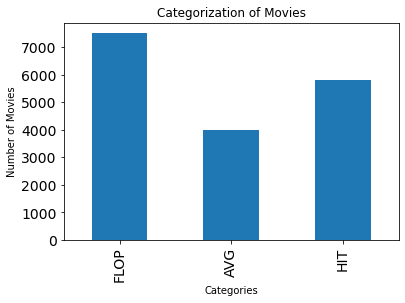

In [8]:
data.groupby(['binned']).size().plot(kind="bar",fontsize=14)
plt.xlabel('Categories')
plt.ylabel('Number of Movies')
plt.title('Categorization of Movies')

In [9]:
#Checking the new column
data.head(5)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,binned
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,FLOP
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,HIT
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,AVG
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,HIT
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,HIT


In [10]:
#Shape of the dataset
data.shape

(17712, 23)

In [11]:
data.drop(columns=['critics_consensus'],inplace=True)

In [12]:
#Total null values present in each column
data.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
binned                               408
dtype: int64

In [13]:
#Droping the samples that have missing values
data.dropna(inplace=True)

In [14]:
#Final shape of the data after Droping missing values
data.shape

(14142, 22)

In [15]:
#List of variables in the datset
data.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count', 'binned'],
      dtype='object')

In [16]:
#Describing the categorical data
data.describe(include='object')

,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,streaming_release_date,production_company,tomatometer_status,audience_status
count,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142,14142
unique,14142,13723,14141,6,984,6909,11365,14140,5291,2049,2381,3,2
top,m/cowboys_and_aliens,The Mummy,"Wisecracking mercenary Deadpool meets Russell,...",R,Drama,Alfred Hitchcock,Woody Allen,Werner Herzog,1988-01-01,2016-08-10,Warner Bros. Pictures,Rotten,Upright
freq,1,4,2,5555,1582,36,33,3,23,1025,480,6333,7640


In [17]:
#Dropping 2 columns
data.drop(columns=['rotten_tomatoes_link','movie_title'],inplace=True)
data.drop(columns=['original_release_date'],inplace=True)
data.drop(columns=['streaming_release_date'],inplace=True)
data.drop(columns=['tomatometer_status'],inplace=True)

In [18]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_list=['movie_info', 'content_rating', 'genres', 'directors', 'authors',
       'actors',
       'production_company','audience_status']
data[cat_list]=data[cat_list].apply(lambda x:le.fit_transform(x))

In [19]:
#A sample of data after label encoding
data.head()

,movie_info,content_rating,genres,directors,authors,actors,runtime,production_company,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,binned
0,3391,3,207,1089,2153,8504,119.0,5,49.0,149.0,0,53.0,254421.0,43,73,76,FLOP
1,8848,5,694,4910,8165,2113,90.0,1912,87.0,142.0,1,64.0,11574.0,44,123,19,HIT
2,1961,5,793,722,1187,3646,122.0,2268,67.0,24.0,0,53.0,14684.0,2,16,8,AVG
3,6362,2,633,6067,8975,8962,95.0,534,100.0,54.0,1,97.0,105386.0,6,54,0,HIT
4,7222,0,263,5470,3142,5804,127.0,592,89.0,27.0,1,74.0,68918.0,5,24,3,HIT


<AxesSubplot:>

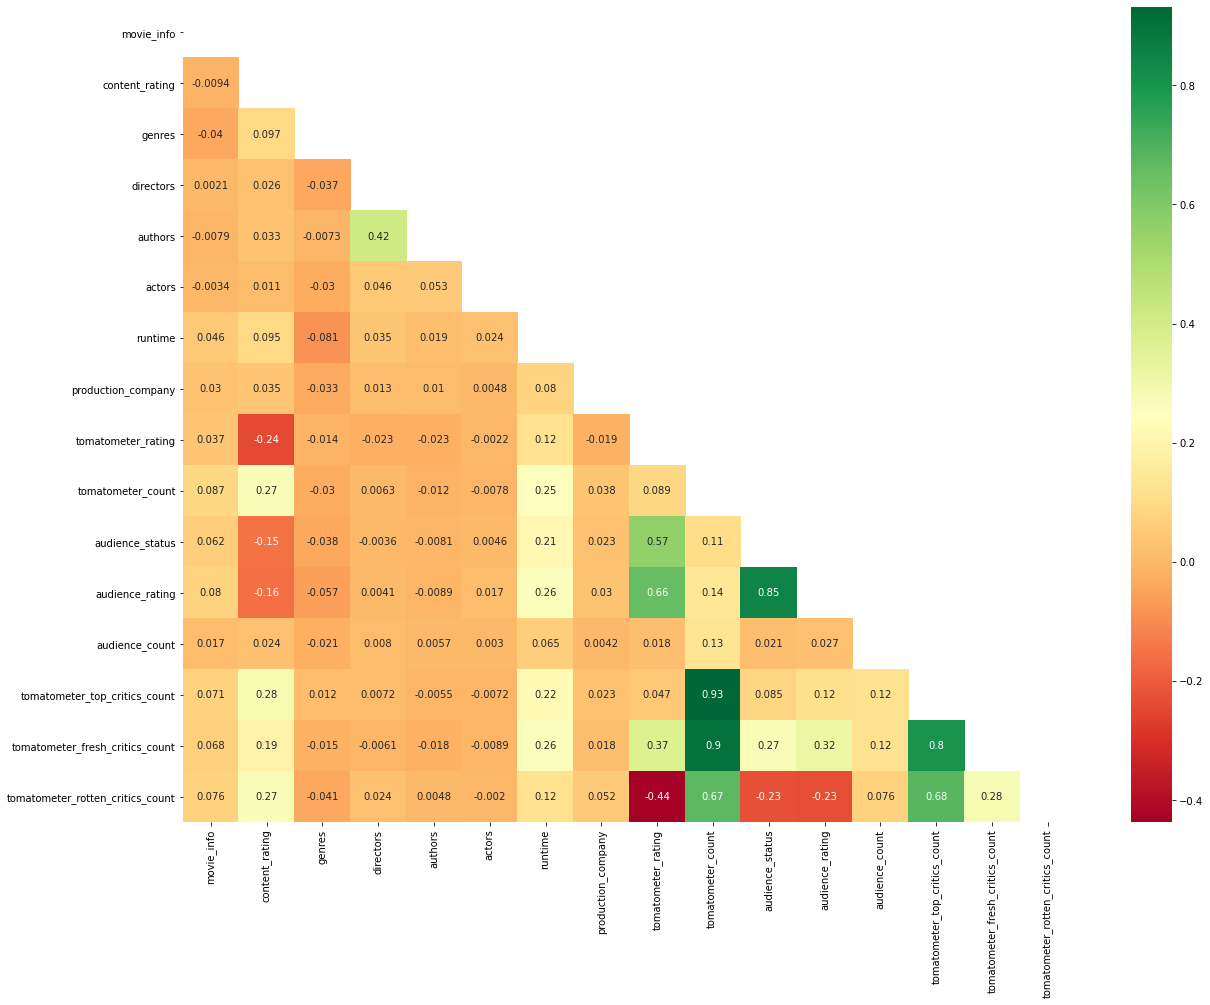

In [21]:
#Finding Correlation between variables
import seaborn as sns
corr = data.corr()
mask = np.zeros(corr.shape, dtype=bool)
mask[np.triu_indices(len(mask))] = True
plt.subplots(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn',annot=True,mask = mask)

In [22]:
#Removing the column "imdb_score" since we have "imdb_binned"
data.drop(columns=['tomatometer_rating'],inplace=True)

In [23]:
data.shape

(14142, 16)

In [25]:
#Independent Variables
X = data.iloc[:, 0:15].values
#Dependent/Target Variable
y = data.iloc[:, 15].values
y

['FLOP', 'HIT', 'AVG', 'HIT', 'HIT', ..., 'FLOP', 'FLOP', 'HIT', 'HIT', 'FLOP']
Length: 14142
Categories (3, object): ['FLOP' < 'AVG' < 'HIT']

In [26]:
#Spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)
print(X_train.shape)
print(y_train.shape)

(9899, 15)
(9899,)


In [27]:
from pandas.plotting import scatter_matrix

In [32]:
#training and testing KNN Classifier alorithm.
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.3829837379212821